In [63]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from matplotlib import font_manager, rc

df_uriversityNumber = pd.read_csv('연도별대학교수.csv') 

# df_uriversityNumber.loc[0].head(10)
uri_type = df_uriversityNumber.loc[0]
uri_type.head(10)
# uri_type[2]
# # # df_uriversityNumber.loc[0][1] = '전체'
# # # df_uriversityNumber.loc[0]
for i in range(1,len(uri_type)):
    if i % 5 == 1:
        uri_type[i] = '전체대학수'
    elif i % 5 == 2:
        uri_type[i] = '일반대학'
    elif i % 5 == 3:
        uri_type[i] = '전문대학'
    elif i % 5 == 4:
        uri_type[i] = '교육대학'
    else:
        uri_type[i] = '산업대학'

uri_type.head(20)

df_uriversityNumber = df_uriversityNumber.T
df_uriversityNumber




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
행정구역별,행정구역별,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2003,전체대학수,357,52,23,10,10,16,15,3,-,61,20,16,24,21,23,38,19,6
2003.1,일반대학,169,38,11,2,4,7,8,1,-,24,8,8,13,9,10,18,6,2
2003.2,전문대학,158,12,10,7,5,7,5,2,-,35,10,6,8,10,11,18,9,3
2003.3,교육대학,11,1,1,1,1,1,-,-,-,-,1,1,1,1,-,-,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,전체대학수,335,48,21,11,7,17,15,4,3,60,17,17,21,18,19,33,20,4
2023.1,일반대학,190,38,12,3,3,10,11,2,2,30,8,11,13,8,10,18,9,2
2023.2,전문대학,133,9,8,7,3,6,4,2,1,30,8,5,6,8,9,15,10,2
2023.3,교육대학,10,1,1,1,1,1,-,-,-,-,1,1,1,1,-,-,1,-


In [73]:
#입학정원
df_admissionCapasity = pd.read_csv('연도별입학정원.csv',encoding='utf-8')

df_admissionCapasity.head()

df_ac = df_admissionCapasity
print(uri_type.unique())
# 일반대학, 전문대학, 교육대학, 산업대학 제외한 모든 칼럼 삭제 
df_ac =  df_ac[['연도','시도','일반대학','전문대학','교육대학','산업대학']]
df_ac = df_ac.dropna()
df_ac = df_ac.reset_index(drop=True)
# print(df_ac.info())

ac_totalNum=df_ac['일반대학']+df_ac['전문대학']+df_ac['교육대학']+df_ac['산업대학']
df_ac.insert(loc=2,column='전체모집정원',value=ac_totalNum)
location = list(df_ac['시도'].unique())
year = list(df_ac['연도'].unique())

# 연도/지역별 전체모집정원
# df_ac_year = np.zeros((len(year),len(location)))

# for i in range(len(df_ac)):

df_ac_year = df_ac.pivot(index='연도',columns='시도', values='전체모집정원')
# pd.pivot() : 데이터프레임 재구조


# 세종시 만들어지기 전 대학 정원에 대한 널값에 0명 채우기 
df_ac_year.fillna(0,inplace=True) 
df_ac_year = df_ac_year[location]   # 피벗 후 컬럼 정렬 
df_ac_year.reset_index(inplace=True)
df_ac_year




['행정구역별' '전체대학수' '일반대학' '전문대학' '교육대학' '산업대학']


시도,연도,전체,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,1999,640840.0,97175.0,57100.0,30635.0,17500.0,29530.0,30665.0,5480.0,0.0,103175.0,30373.0,26835.0,42165.0,36202.0,29155.0,62595.0,33005.0,9250.0
1,2000,646275.0,97121.0,58180.0,30540.0,17780.0,29695.0,31150.0,5580.0,0.0,104484.0,29088.0,27180.0,43000.0,36627.0,29095.0,63360.0,34160.0,9235.0
2,2001,646770.0,95576.0,58011.0,30467.0,17780.0,29645.0,31318.0,6720.0,0.0,106000.0,29193.0,27430.0,44058.0,36377.0,28550.0,62560.0,34230.0,8855.0
3,2002,656783.0,94932.0,58655.0,29856.0,17814.0,30391.0,31697.0,6670.0,0.0,108083.0,30573.0,29568.0,46818.0,36390.0,28431.0,63930.0,34344.0,8631.0
4,2003,653170.0,94622.0,56331.0,29684.0,17778.0,30727.0,31749.0,6615.0,0.0,108007.0,31030.0,28970.0,47255.0,36362.0,28213.0,64070.0,33120.0,8637.0
5,2004,642256.0,94487.0,55434.0,29339.0,17626.0,29299.0,31528.0,6404.0,0.0,107552.0,30666.0,28505.0,46756.0,35313.0,27067.0,61691.0,32321.0,8268.0
6,2005,625541.0,91833.0,54504.0,28328.0,17626.0,27782.0,30782.0,6134.0,0.0,109453.0,29425.0,27670.0,45500.0,33438.0,25375.0,57768.0,31836.0,8087.0
7,2006,596313.0,90199.0,51303.0,27167.0,16206.0,25659.0,29978.0,6134.0,0.0,107242.0,27788.0,25995.0,44133.0,30641.0,23758.0,53963.0,28665.0,7482.0
8,2007,584789.0,89080.0,50602.0,26479.0,15890.0,24742.0,29779.0,6134.0,0.0,103844.0,27035.0,25777.0,43907.0,30281.0,23454.0,51932.0,28445.0,7408.0
9,2008,581991.0,87810.0,50439.0,26378.0,15860.0,24424.0,28249.0,6159.0,0.0,106248.0,27098.0,25599.0,43875.0,29550.0,23282.0,51401.0,28239.0,7380.0



-
-선 그래프 y축 수치 나오게 하기 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


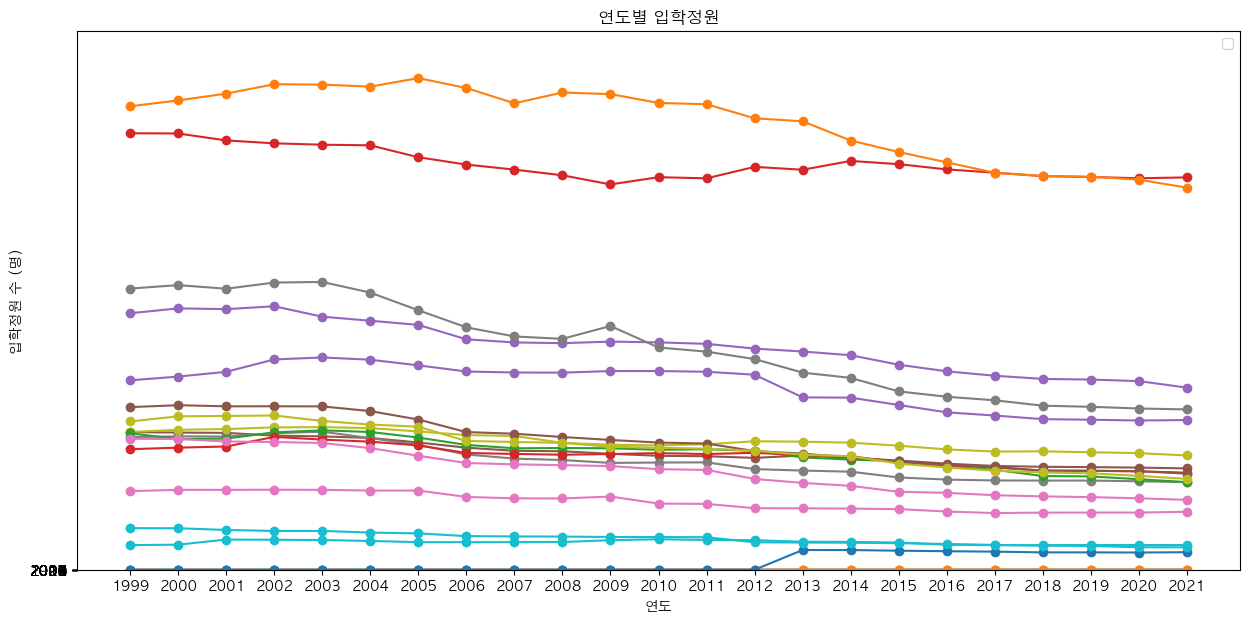

In [130]:
#연도별 입학정원 시각화 
fig, ax = plt.subplots(1,1,figsize=(15,7))
plt.rcParams['font.family'] = 'AppleGothic'

for i in df_ac_year.columns:
    plt.plot(df_ac_year['연도'], df_ac_year[i], marker='o')
plt.title('연도별 입학정원')

plt.xlabel('연도')
plt.ylim(0,120000)
plt.ylabel('입학정원 수 (명)')

plt.legend()

plt.show()

In [104]:
df_un = df_uriversityNumber.T
df_un.rename(columns={'행정구역별':'연도'},inplace=True)
df_un = df_un.T
df_un = df_un.rename(columns=df_un.iloc[0]) # 첫번째 행을 컬럼명으로 

col = ['전국','서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도']
df_un_common = df_un[df_un['행정구역별']=='일반대학']
df_un_common['연도']=df_un_common.index
df_un_common = pd.melt(df_un_common, id_vars=['연도'],value_vars=col)
df_un_common.columns=['연도','지역','일반대학교수']
df_un_common 

df_un_special = df_un[df_un['행정구역별']=='전문대학']
df_un_special['연도']=df_un_special.index
df_un_special = pd.melt(df_un_special, id_vars=['연도'],value_vars=col)
df_un_special.columns=['연도','지역','전문대학교수'] 
df_un_special

df_un_education = df_un[df_un['행정구역별']=='교육대학']
df_un_education['연도']=df_un_education.index
df_un_education = pd.melt(df_un_education, id_vars=['연도'],value_vars=col)
df_un_education.columns=['연도','지역','교육대학교수'] 
df_un_education

df_un_indusity = df_un[df_un['행정구역별']=='산업대학']
df_un_indusity['연도']=df_un_indusity.index
df_un_indusity = pd.melt(df_un_indusity, id_vars=['연도'],value_vars=col)
df_un_indusity.columns=['연도','지역','산업대학교수'] 
df_un_indusity

df_un_total_t = df_un[df_un['행정구역별']=='전체대학수']

df_un_total = df_un[df_un['행정구역별']=='전체대학수']
df_un_total['연도']=df_un_total.index
df_un_total = pd.melt(df_un_total, id_vars=['연도'],value_vars=col)
df_un_total.columns=['연도','지역','전체대학교수'] 
df_un_total_t


label = location[2:]
index = np.arange(len(label))

# plt.bar(index, )


plt.show()
df_un_total_t


/var/folders/q1/gbj377r930j24dy_m_bb7pz40000gn/T/ipykernel_887/3263666800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_un_common['연도']=df_un_common.index
/var/folders/q1/gbj377r930j24dy_m_bb7pz40000gn/T/ipykernel_887/3263666800.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_un_special['연도']=df_un_special.index
/var/folders/q1/gbj377r930j24dy_m_bb7pz40000gn/T/ipykernel_887/3263666800.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,행정구역별,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2003,전체대학수,357,52,23,10,10,16,15,3,-,61,20,16,24,21,23,38,19,6
2004,전체대학수,358,52,23,10,10,16,15,3,-,63,20,16,24,21,22,38,19,6
2005,전체대학수,360,52,23,11,10,16,15,3,-,64,20,16,23,21,22,38,20,6
2006,전체대학수,352,51,22,11,9,16,15,3,-,63,19,15,23,21,21,38,19,6
2007,전체대학수,348,50,22,11,9,16,15,3,-,61,18,15,23,21,21,38,19,6
2008,전체대학수,344,49,22,11,9,16,15,3,-,62,18,15,23,20,21,36,19,5
2009,전체대학수,345,49,22,11,9,16,14,4,-,62,18,16,23,20,21,36,19,5
2010,전체대학수,345,49,22,11,8,16,14,4,-,62,18,16,23,20,21,36,20,5
2011,전체대학수,349,49,22,11,8,17,15,4,-,63,19,16,23,20,21,36,20,5
2012,전체대학수,343,48,22,11,7,17,15,4,-,62,19,16,23,20,19,36,20,4


In [ ]:
# 전체 학교 수에서 학교 타입으로 비율 => 파이 시각화

# # ratio = df_un_total_t.loc['2013'][2:]
# # labels = df_un_total_t.columns[2:]

# fig, ax = plt.subplots(1,2,figsize=(10,3))
# sns.barplot(data=ratio, y='학교수', x=labels, ax=ax[0
#                                                  ])
# # plt.pie(ratio, labels=labels, autopct='%.1f%%',ax=ax[0])
# # plt.legend()
# plt.show()

In [ ]:
# 전체 학교 수에서 학교 타입으로 비율 => 파이 시각화

sch_num = 


In [16]:
# 연도별 대학교 수
# 한 열로 만들어야됨!!
# df_uriversityNumber1[df_uriversityNumber1.index=='행정구역별'] = location



In [17]:
# 입학자 수 
df_admissionNumber = pd.read_csv('연도별입학자수.csv', encoding = 'utf-8')

df_admissionNumber.head()

df_an = df_admissionNumber
print(uri_type.unique())

df_an =  df_an[['연도','시도','일반대학','전문대학','교육대학','산업대학']]
df_an = df_an.dropna()
df_an = df_an.reset_index(drop=True)

df_an[df_an.columns[2:]] = df_an[df_an.columns[2:]].astype(float)
 
an_totalNum= df_an['일반대학']+ df_an['전문대학']+df_an['교육대학']+df_an['산업대학']#object to float 타입변환해야함 
df_an.insert(loc=2,column='전체모집정원',value=an_totalNum)
# location = list(df_an['시도'].unique())
# year = list(df_an['연도'].unique())

df_an_year = df_an.pivot(index='연도',columns='시도', values='전체모집정원')
# pd.pivot() : 데이터프레임 재구조


# 세종시 만들어지기 전 대학 정원에 대한 널값에 0명 채우기 
df_an_year.fillna(0,inplace=True) 
df_an_year = df_an_year[location]   # 피벗 후 컬럼 정렬 
df_an_year


['행정구역별' '전체대학수' '일반대학' '전문대학' '교육대학' '산업대학']


시도,전체,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
연도,,,,,,,,,,,,,,,,,,
1999,661802.0,103596.0,60619.0,33452.0,19064.0,30183.0,30713.0,5621.0,0.0,110933.0,29329.0,28374.0,44279.0,33867.0,26147.0,61448.0,35351.0,8826.0
2000,677849.0,103955.0,62845.0,34555.0,19114.0,30688.0,32813.0,6754.0,0.0,115803.0,29818.0,29012.0,44579.0,32842.0,25324.0,61917.0,38142.0,9688.0
2001,688547.0,102115.0,62677.0,33975.0,19668.0,30813.0,32874.0,7827.0,0.0,117043.0,30494.0,28735.0,46017.0,36385.0,28262.0,63777.0,38251.0,9634.0
2002,668705.0,102733.0,62102.0,31465.0,20019.0,29095.0,32131.0,7538.0,0.0,120702.0,29356.0,29450.0,47022.0,31516.0,25197.0,56583.0,35126.0,8670.0
2003,631320.0,102860.0,55854.0,27615.0,20069.0,27073.0,30229.0,7205.0,0.0,119389.0,26281.0,26605.0,46475.0,28500.0,23361.0,50850.0,31261.0,7693.0
2004,622918.0,103382.0,54275.0,28015.0,19734.0,26561.0,29922.0,6701.0,0.0,117526.0,25416.0,25407.0,46244.0,27880.0,23335.0,50017.0,31353.0,7150.0
2005,611952.0,100147.0,52869.0,27689.0,19229.0,25975.0,29434.0,6747.0,0.0,118475.0,25077.0,24801.0,44298.0,27983.0,23130.0,48910.0,30349.0,6839.0
2006,618310.0,99933.0,54217.0,28659.0,18035.0,26276.0,30529.0,6647.0,0.0,120263.0,25252.0,25445.0,46506.0,28333.0,23254.0,49474.0,28829.0,6658.0
2007,625690.0,99944.0,54640.0,28958.0,17882.0,26557.0,31528.0,6744.0,0.0,115919.0,27549.0,27501.0,47687.0,30054.0,24207.0,50233.0,29641.0,6646.0


In [18]:
location.insert(0,'행정구역별')
location

['행정구역별',
 '전체',
 '서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

In [19]:
# 입학자수 / 대학교 수  = 
# df_an_year / df_un_total_t

# df_an_year.drop(df_an_year.iloc[:4],axis=0)
df_an_div=df_an_year.iloc[4:]
df_an_div

df_un_total_t.columns = location
df_un_total_t =  df_un_total_t.iloc[:19]
df_un_total_t.drop(columns='행정구역별',inplace=True)
df_un_total_t['세종'][:10] = 0
df_un_total_t = df_un_total_t.astype(float)
df_un_total_t
df_an_div
df_stuNum_per = pd.DataFrame()
for i in range(len(df_an_div.columns)):
    df_stuNum_per[df_an_div.columns[i]] = df_an_div[df_an_div.columns[i]]/df_un_total_t[df_un_total_t.columns[i]]

df_stuNum_per.fillna(0,inplace=True)
df_stuNum_per=df_stuNum_per.round(2)
df_stuNum_per   # 한개의 학교당 평균 입학생 수 

# fig, ax = plt.subplots(figsize=(5,10))
# ax.bar(df_stuNum_per['전체'])
# plt.show()

/var/folders/q1/gbj377r930j24dy_m_bb7pz40000gn/T/ipykernel_887/3849831181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_un_total_t.drop(columns='행정구역별',inplace=True)
/var/folders/q1/gbj377r930j24dy_m_bb7pz40000gn/T/ipykernel_887/3849831181.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_un_total_t['세종'][:10] = 0


,전체,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
연도,,,,,,,,,,,,,,,,,,
2003,1768.40,1978.08,2428.43,2761.50,2006.90,1692.06,2015.27,2401.67,0.00,1957.20,1314.05,1662.81,1936.46,1357.14,1015.70,1338.16,1645.32,1282.17
2004,1739.99,1988.12,2359.78,2801.50,1973.40,1660.06,1994.80,2233.67,0.00,1865.49,1270.80,1587.94,1926.83,1327.62,1060.68,1316.24,1650.16,1191.67
2005,1699.87,1925.90,2298.65,2517.18,1922.90,1623.44,1962.27,2249.00,0.00,1851.17,1253.85,1550.06,1926.00,1332.52,1051.36,1287.11,1517.45,1139.83
2006,1756.56,1959.47,2464.41,2605.36,2003.89,1642.25,2035.27,2215.67,0.00,1908.94,1329.05,1696.33,2022.00,1349.19,1107.33,1301.95,1517.32,1109.67
2007,1797.96,1998.88,2483.64,2632.55,1986.89,1659.81,2101.87,2248.00,0.00,1900.31,1530.50,1833.40,2073.35,1431.14,1152.71,1321.92,1560.05,1107.67
2008,1802.44,1992.14,2452.27,2596.27,1950.22,1613.06,2042.87,2250.00,0.00,1922.42,1470.67,1809.80,2087.04,1429.20,1147.76,1384.69,1535.89,1326.60
2009,1782.33,2006.29,2411.91,2576.27,1990.22,1590.00,2114.29,1834.00,0.00,1932.69,1478.17,1661.88,2065.87,1432.05,1112.71,1349.44,1439.89,1284.60
2010,1826.34,2051.10,2502.18,2666.00,1976.00,1665.12,2170.93,1891.50,0.00,1929.82,1544.06,1757.31,2130.35,1459.20,1151.19,1409.22,1473.05,1338.60
2011,1809.04,2047.39,2520.27,2651.91,2056.88,1556.53,2097.33,1866.75,0.00,1903.71,1473.68,1759.81,2126.30,1465.55,1097.57,1427.47,1465.50,1303.80


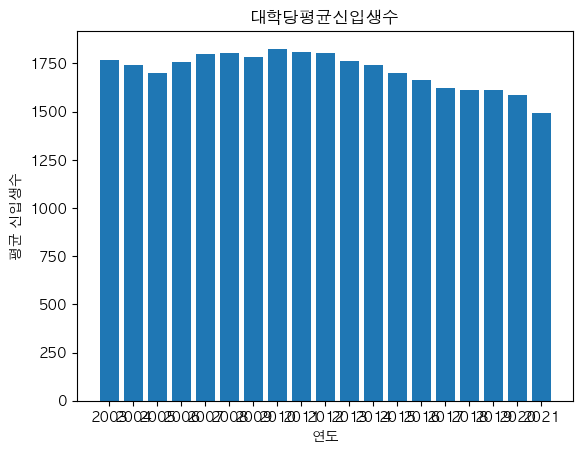

In [120]:
# df_stuNum_per.index

# fig, ax = plt.subplots(figsize=(5,10))
# ax.bar(df_stuNum_per['전체'])
# plt.show()
plt.rcParams['font.family'] = 'AppleGothic'


plt.bar(df_stuNum_per.index, df_stuNum_per['전체'])
plt.title('대학당평균신입생수')
plt.xlabel('연도')
plt.ylabel('평균 신입생수')
plt.show()

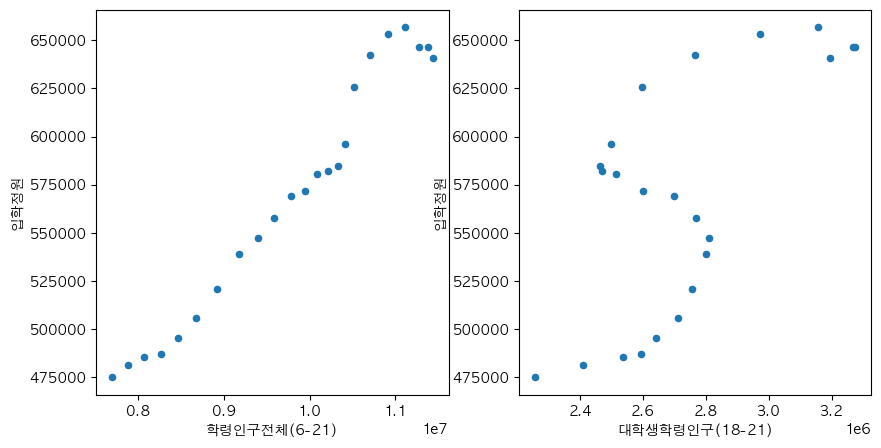

In [121]:
# 한글폰트
# from matplotlib import font_manager, rc
# font_path = 'C:/Windows/Fonts/malgun.ttf'
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name)
# plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'AppleGothic'

# 학령인구
school_age_population = pd.read_csv('학령인구.csv')

sch_age = school_age_population
sch_age = sch_age[25:30].reset_index(drop=True) #학령인구만 뽑아오기
sch_age.drop(sch_age.columns[0],axis=1,inplace=True)    #가정별 칼럼삭제
sch_age.drop([1,2,3],axis=0,inplace=True) # 학령인구(초,중,고)행 삭제
sch_age.reset_index(drop=True,inplace=True)

sch_age = sch_age.T
sch_age.drop('인구종류별',axis=0,inplace=True)
sch_age = sch_age.astype(float)
sch_age.reset_index(inplace=True)
sch_age.columns=['연도','학령인구전체(6-21)','대학생학령인구(18-21)']

# 단위가 천명이여서 명으로 바꾸기 위해 모든 데이터에 *1000
sch_age[sch_age.columns[1:]]=sch_age[sch_age.columns[1:]]*1000
# 널값으로 나오는 이유가 
# ac데이터가 피벗써서 인덱스랑 같이 출력됨...인거같은디
#해결=>
df_ac_year.reset_index(inplace=True)

# 입학정원 예측
sch_age_ac = sch_age
# df_ac_year['전체']
sch_age_ac.insert(loc=3,column='입학정원',value=df_ac_year['전체'])
# sch_age_an = sch_age.insert(loc=3,column='입학자수',value=df_an_year['전체'])
sch_age_ac


fig, ax = plt.subplots(1,2,figsize=(10,5))

# x= 학령인구전체 , y=입학정원 => 입학정원 미래예측 
sch_age_ac.plot.scatter(x='학령인구전체(6-21)',y='입학정원',ax=ax[0])
sch_age_ac.plot.scatter(x='대학생학령인구(18-21)',y='입학정원',ax=ax[1])
plt.show()


In [22]:
# sch_age_an=sch_age.drop(columns='입학정원')
# df_an_year.reset_index(inplace=True)
# sch_age_an.insert(loc=3,column='입학자수',value=df_an_year['전체'])

# sch_age_an
# fig, ax = plt.subplots(1,2,figsize=(10,5))
# sch_age_an.plot.scatter(x='학령인구전체(6-21)',y='입학자수',ax=ax[0])
# sch_age_an.plot.scatter(x='대학생학령인구(18-21)',y='입학자수',ax=ax[1])

# plt.show()

# 산전도는 추세 


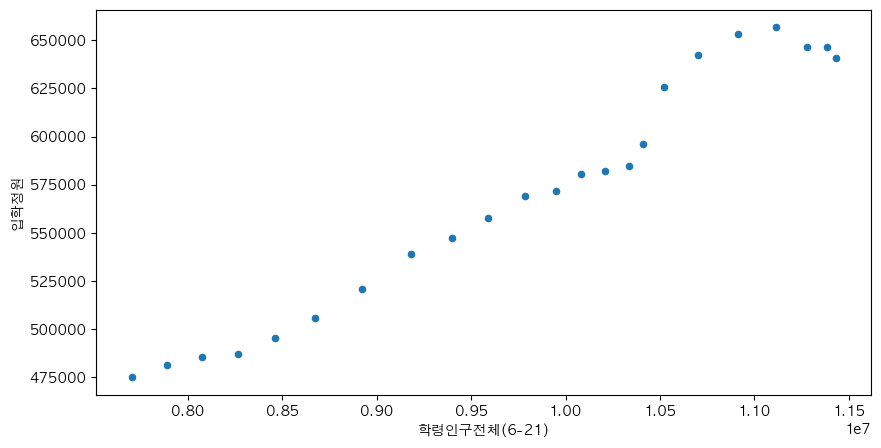

In [122]:
# 입학자수 또는 입학정원 예측 

# 단순 선형 회귀 분석 

plt.rcParams['font.family'] = 'AppleGothic'


sch_age_ac

fig, ax = plt.subplots(1,1,figsize=(10,5))
sch_age_ac.plot.scatter(x='학령인구전체(6-21)', y='입학정원', ax=ax)

plt.show()
# 선의 방향이 좌하 -> 우상
# 양의관계: 한 변수의 값이 증가하면 다른 변수의 값은 감소를 의미 
# 독립변수 x=학령인구전체 6-21,  종속변수 y=입학정원

<Axes: xlabel='학령인구전체(6-21)', ylabel='입학정원'>

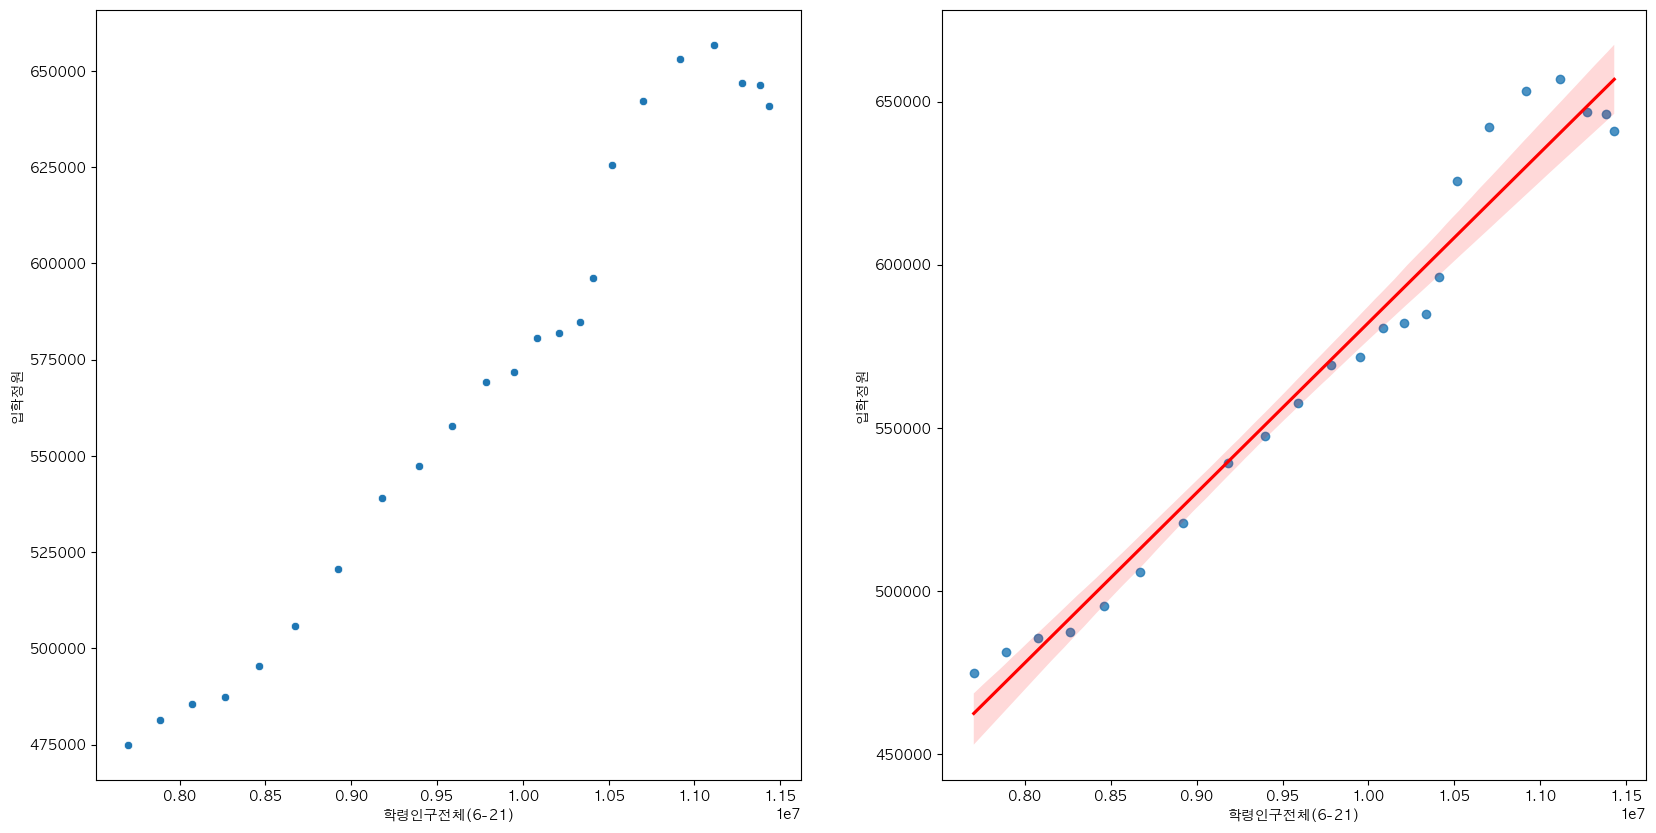

In [124]:
plt.rcParams['font.family'] = 'AppleGothic'


fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.scatterplot(data=sch_age_ac,x='학령인구전체(6-21)', y='입학정원', ax=ax[0])
sns.regplot(data=sch_age_ac,x='학령인구전체(6-21)', y='입학정원', ax=ax[1], line_kws={'color':'red'})




/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


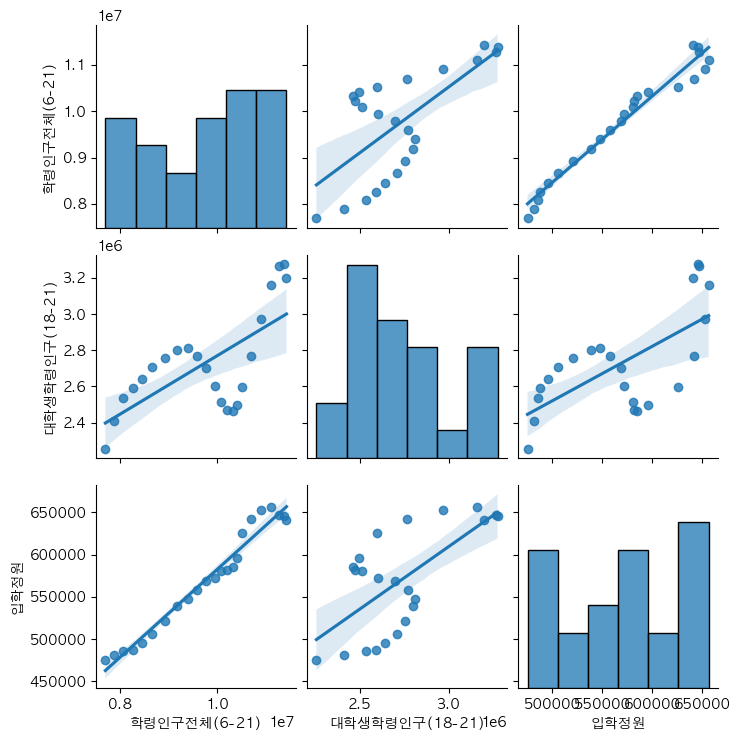

In [126]:
plt.rcParams['font.family'] = 'AppleGothic'


sns.pairplot(data=sch_age_ac, kind='reg')

In [37]:
!pip install scikit-learn

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_age = sch_age_ac[['학령인구전체(6-21)']]    #힉령인구 
y = sch_age_ac['입학정원']     #입학정원

X_train, X_test, y_train, y_test = train_test_split(
    X_age, 
    y,              
    test_size=0.3,  
    random_state=10
)
# len(X_train)

model = LinearRegression()

model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)

test_score
# 결정계수 : 0.9635558419767561 => 일반화가 잘 되있다?


0.9635558419767561

/Applications/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


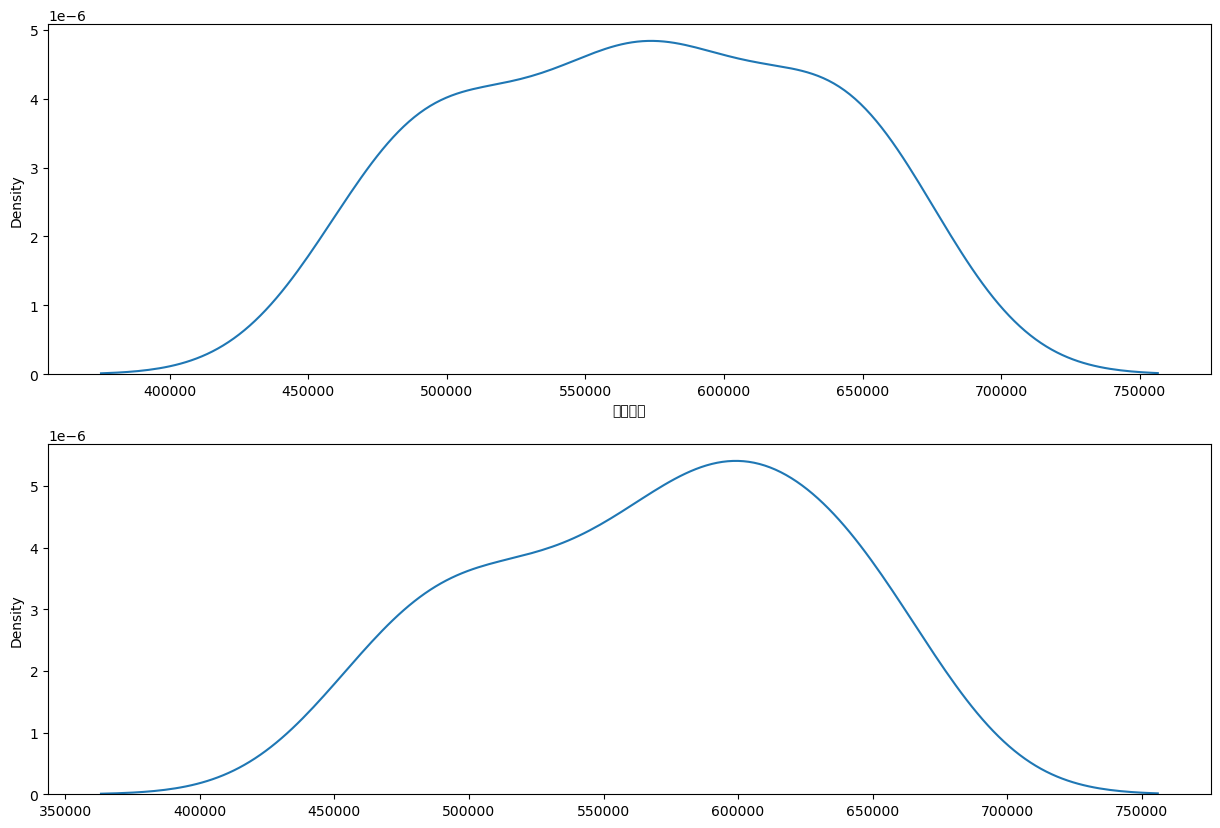

In [48]:
# 입학정원 예측 결과

y_predict = model.predict(X_age)

fig, ax = plt.subplots(2,1,figsize=(15,10))

sns.kdeplot(data=y, label='입학정원', ax=ax[0])
sns.kdeplot(data=y_predict, label='입학정원', ax=ax[1])

# ax.legend()
plt.show()

In [50]:
# 다중 회귀 분석 => x : 학령인구전체/대학생을 같이 넣으면 
# XXXX => 결정계수가 더 낮아짐 

# X_age2 = sch_age_ac[['학령인구전체(6-21)','대학생학령인구(18-21)' ]]
# X_train,X_test,y_train,y_test = train_test_split(
#     X_age2,
#     y,
#     test_size=0.3,
#     random_state=10)

# model = LinearRegression()
# model.fit(X_train, y_train)

# test_score2 = model.score(X_test,y_test)
# test_score2

0.9626950283774419

0.9567885283801896


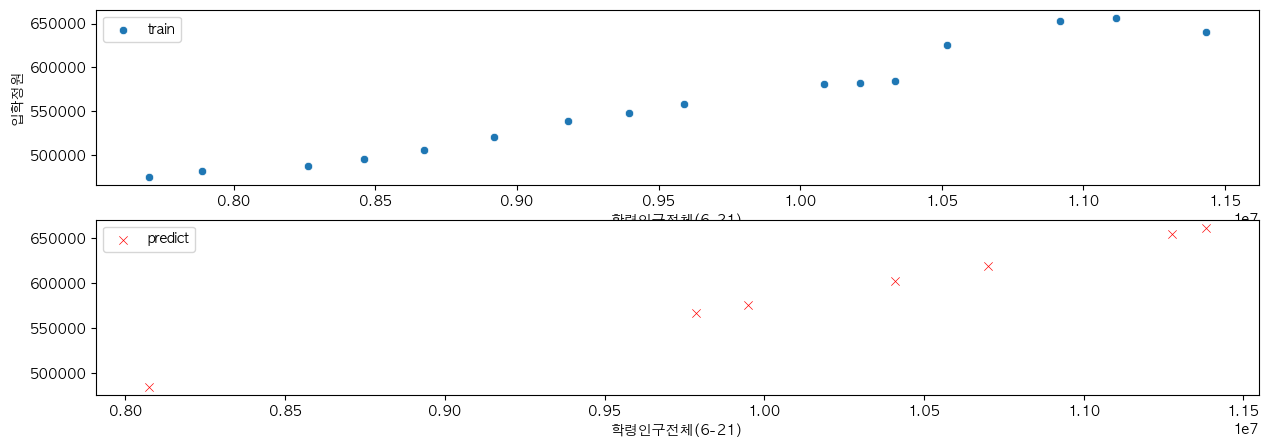

In [127]:
# 다항 회귀분석
from sklearn.preprocessing import PolynomialFeatures

X_data = sch_age_ac[['학령인구전체(6-21)']]    #힉령인구 
y_data = sch_age_ac['입학정원']     #입학정원

X_train, X_test, y_train, y_test = train_test_split(
    X_data, 
    y_data,              
    test_size=0.3,  
    random_state=10
)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly,y_train)

X_test_poly=poly.fit_transform(X_test)
test_score_2 = model.score(X_test_poly,y_test)

print(test_score_2)

# 단순선형회귀분석 결정계수: 0.9635558419767561
# 다항회귀분석 결정계수 : 0.9567885283801896


y_predict = model.predict(X_test_poly)

y_predict

plt.rcParams['font.family'] = 'AppleGothic'
fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.scatterplot(x=X_train['학령인구전체(6-21)'], y=y_train, ax=ax[0], label='train')
sns.scatterplot(x=X_test['학령인구전체(6-21)'], y=y_predict.ravel(), ax=ax[1], label='predict', color='red', marker='x')

plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


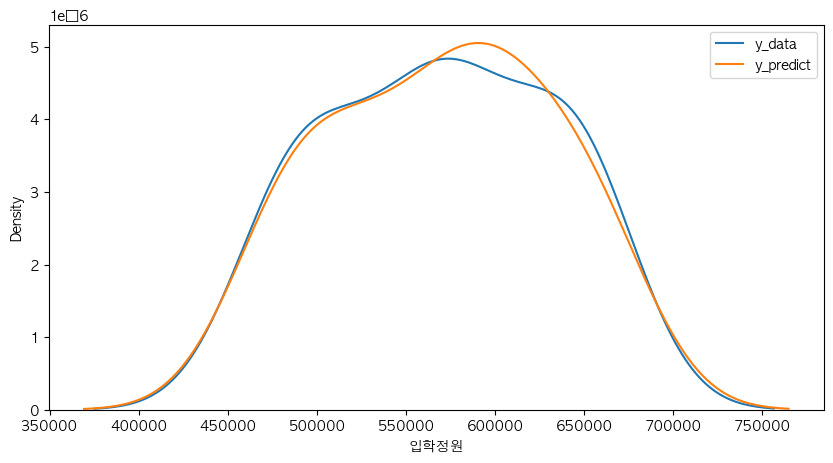

In [128]:
# 전체적인 정확도
X_poly = poly.fit_transform(X_data)
y_predict = model.predict(X_poly)

fig, ax = plt.subplots(1,1, figsize=(10, 5))

plt.rcParams['font.family'] = 'AppleGothic'

sns.kdeplot(data=y_data, label='y_data', ax=ax)
sns.kdeplot(data=y_predict, label='y_predict', ax=ax)
# y_data

plt.legend()

plt.show()

In [24]:
df_an_year
# df_ac_year

'''
대입할 초등학생의 학령인구 '''

'\n대입할 초등학생의 학령인구 '